In [1]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing 

from scipy.integrate import newton_cotes # coefficients for Newton-Cotes quadrature rule
from scipy.special import roots_legendre # coefficients for Gauss-Legendre quadrature rule

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)

In [2]:
def SIR_model(S0, I0, alpha, beta, tmax):
    
    tab_t = np.arange(0, tmax+1)
    S = np.zeros(tmax+1)
    I = np.zeros(tmax+1)
    R = np.zeros(tmax+1)
    border_up = np.ones(tmax+1)
    border_down = np.zeros(tmax+1)
    
    S[0] = S0
    I[0] = I0
    R[0] = 1 - S0 - I0 
    
    for t in range(1, tmax+1):
        #We multiply by 0.05 to make the difference in time between time t and time t+1 as small as possible
        S[t] = S[t-1] + 0.05*( - alpha*S[t-1]*I[t-1]) 
        I[t] = I[t-1] + 0.05*(alpha*S[t-1]*I[t-1] - beta*I[t-1])
        R[t] = R[t-1] + 0.05*(beta*I[t-1])
    
    print(f'Equilibrium: ({round(S[tmax], 3)}, {round(I[tmax], 3)}, {round(R[tmax], 3)})')    
    
    #plot
    fig = plt.figure(figsize=(15, 8))
    plt.plot(tab_t, S, label = '$S(t)$')
    plt.plot(tab_t, I, label = '$I(t)$')
    plt.plot(tab_t, R, label = '$R(t)$')
    plt.plot(tab_t, border_down, 'k')
    plt.plot(tab_t, border_up, 'k')
    plt.xlabel('Time', fontsize = 18)
    plt.ylabel('$S(t)$, $I(t)$, $R(t)$', fontsize = 18)
    plt.legend(fontsize = 18)
    plt.title('Evolution of the SIR model', fontsize = 18)
    plt.show()

Equilibrium: (0.001, 0.003, 0.996)


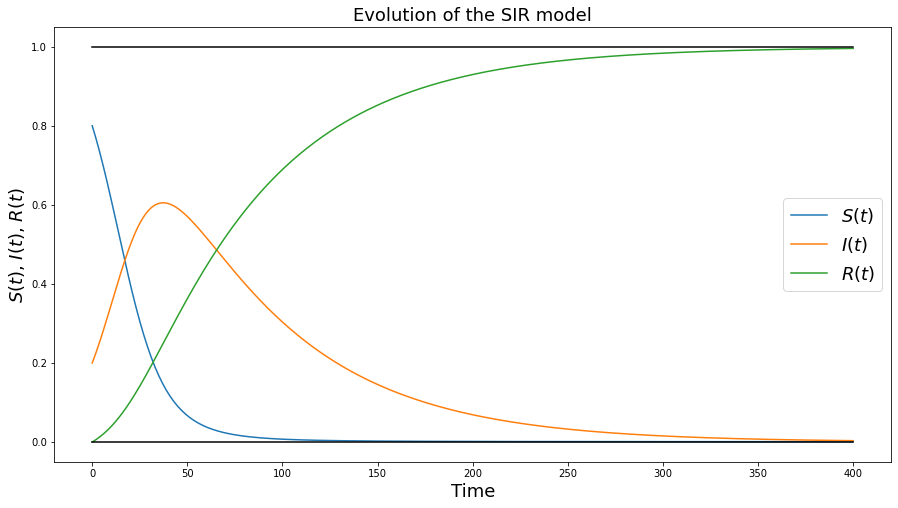

In [3]:
#Example 1

S0 = 0.8
I0 = 0.2
alpha = 2
beta = 0.3
tmax = 400

SIR_model(S0, I0, alpha, beta, tmax)

Equilibrium: (0.0, 0.003, 0.997)


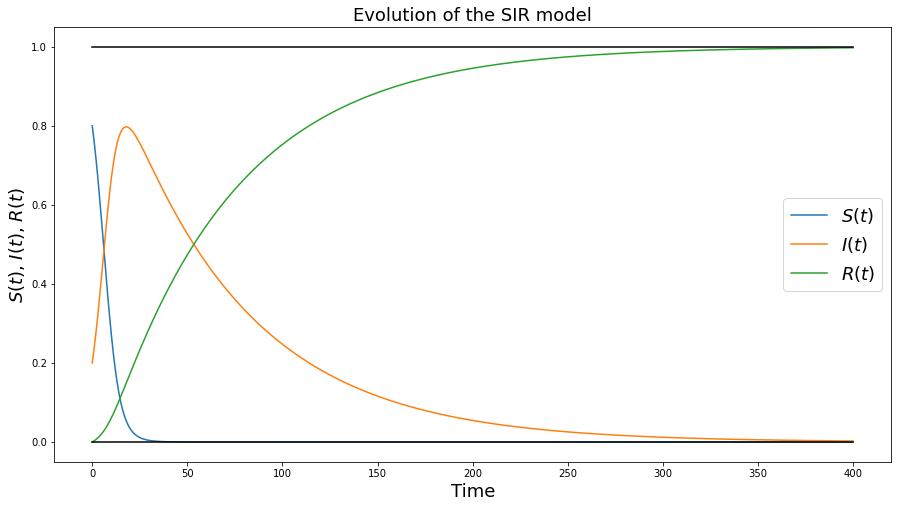

In [4]:
#Example 2

S0 = 0.8
I0 = 0.2
alpha = 5
beta = 0.3
tmax = 400

SIR_model(S0, I0, alpha, beta, tmax)

Equilibrium: (0.078, 0.0, 0.922)


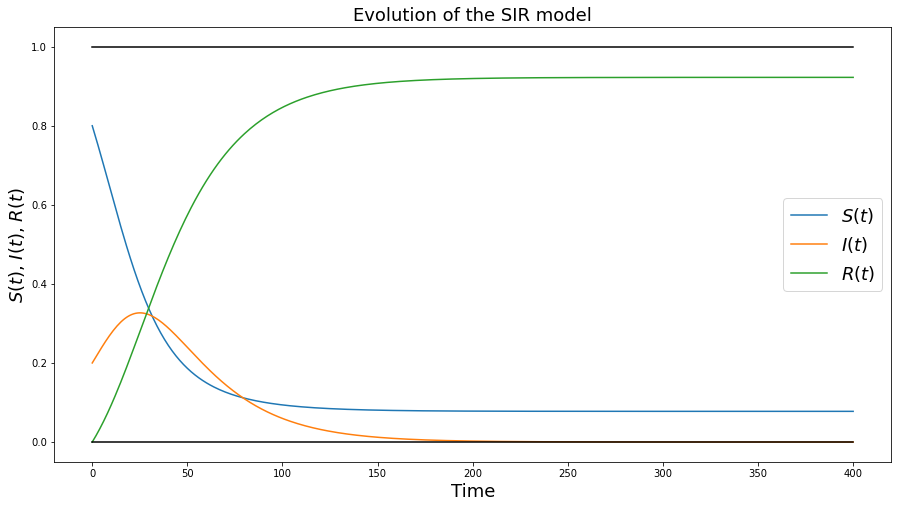

In [6]:
#Example 3

S0 = 0.8
I0 = 0.2
alpha = 2
beta = 0.8
tmax = 400

SIR_model(S0, I0, alpha, beta, tmax)

In [7]:
def SIR_model_Vital_Dynamics(S0, I0, alpha, beta, delta, mu, tmax):
    
    tab_t = np.arange(0, tmax+1)
    S = np.zeros(tmax+1)
    I = np.zeros(tmax+1)
    R = np.zeros(tmax+1)
    D = np.zeros(tmax+1)
    border_up = np.ones(tmax+1)
    border_down = np.zeros(tmax+1)
    
    S[0] = S0
    I[0] = I0
    R[0] = 1 - S0 - I0
    
    
    for t in range(1, tmax+1):
        #We multiply by 0.05 to make the difference in time between time t and time t+1 as small as possible
        S[t] = S[t-1] + 0.05*(- alpha*S[t-1]*I[t-1] + mu*(I[t-1]+R[t-1]))
        I[t] = I[t-1] + 0.05*(alpha*S[t-1]*I[t-1] - beta*I[t-1] - delta*I[t-1] - mu*I[t-1])
        R[t] = R[t-1] + 0.05*(beta*I[t-1] - mu*R[t-1])
        D[t] = D[t-1] + 0.05*(delta*I[t-1])
    
    print(f'Equilibrium: ({round(S[tmax], 3)}, {round(I[tmax], 3)}, {round(R[tmax], 3)}, {round(D[tmax], 3)})')
    
    #plot
    fig = plt.figure(figsize=(15, 8))
    plt.plot(tab_t, S, label = '$S(t)$')
    plt.plot(tab_t, I, label = '$I(t)$')
    plt.plot(tab_t, R, label = '$R(t)$')
    plt.plot(tab_t, D, label = '$D(t)$')
    plt.plot(tab_t, border_down, 'k')
    plt.plot(tab_t, border_up, 'k')
    plt.xlabel('Time', fontsize = 18)
    plt.ylabel('$S(t)$, $I(t)$, $R(t)$', fontsize = 18)
    plt.legend(fontsize = 18)
    plt.title('Evolution of the SIR model', fontsize = 18)
    plt.show()

Equilibrium: (0.379, 0.0, 0.001, 0.62)


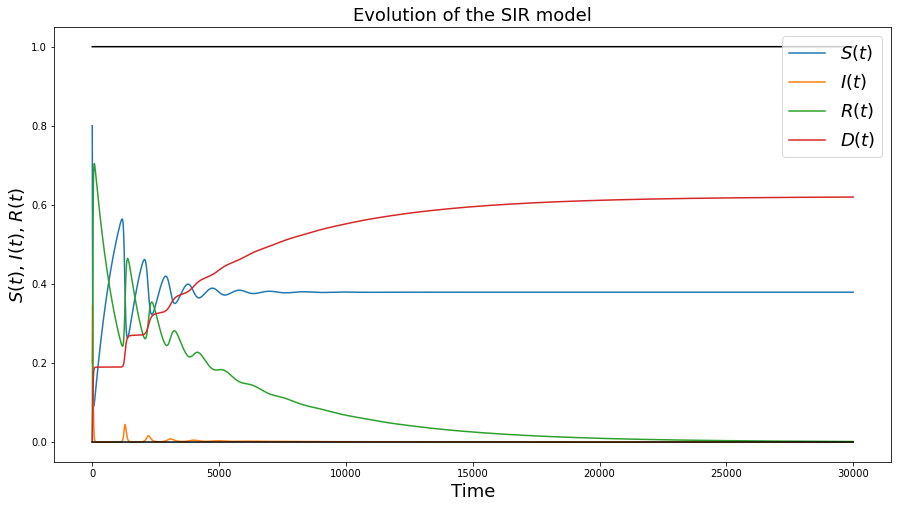

In [9]:
#Example 1

S0 = 0.8
I0 = 0.2
alpha = 4
beta = 1.2
delta = 0.3
mu = 0.02
tmax = 30000

SIR_model_Vital_Dynamics(S0, I0, alpha, beta, delta, mu, tmax)

In [10]:
def SIR_model_Vital_Dynamics_delta0(S0, I0, alpha, beta, mu, tmax):
    
    tab_t = np.arange(0, tmax+1)
    S = np.zeros(tmax+1)
    I = np.zeros(tmax+1)
    R = np.zeros(tmax+1)
    border_up = np.ones(tmax+1)
    border_down = np.zeros(tmax+1)
    
    S[0] = S0
    I[0] = I0
    R[0] = 1 - S0 - I0
    
    
    for t in range(1, tmax+1):
        #We multiply by 0.05 to make the difference in time between time t and time t+1 as small as possible
        S[t] = S[t-1] + 0.05*(- alpha*S[t-1]*I[t-1] + mu - mu*S[t-1]) 
        I[t] = I[t-1] + 0.05*(alpha*S[t-1]*I[t-1] - beta*I[t-1] - mu*I[t-1])
        R[t] = R[t-1] + 0.05*(beta*I[t-1] - mu*R[t-1])
    
    print(f'Equilibrium: ({round(S[tmax], 3)}, {round(I[tmax], 3)}, {round(R[tmax], 3)})')
    
    #plot
    fig = plt.figure(figsize=(15, 8))
    plt.plot(tab_t, S, label = '$S(t)$')
    plt.plot(tab_t, I, label = '$I(t)$')
    plt.plot(tab_t, R, label = '$R(t)$')
    plt.plot(tab_t, border_down, 'k')
    plt.plot(tab_t, border_up, 'k')
    plt.xlabel('Time', fontsize = 18)
    plt.ylabel('$S(t)$, $I(t)$, $R(t)$', fontsize = 18)
    plt.legend(fontsize = 18)
    plt.title('Evolution of the SIR model', fontsize = 18)
    plt.show()

Equilibrium: (0.578, 0.0, 0.422)


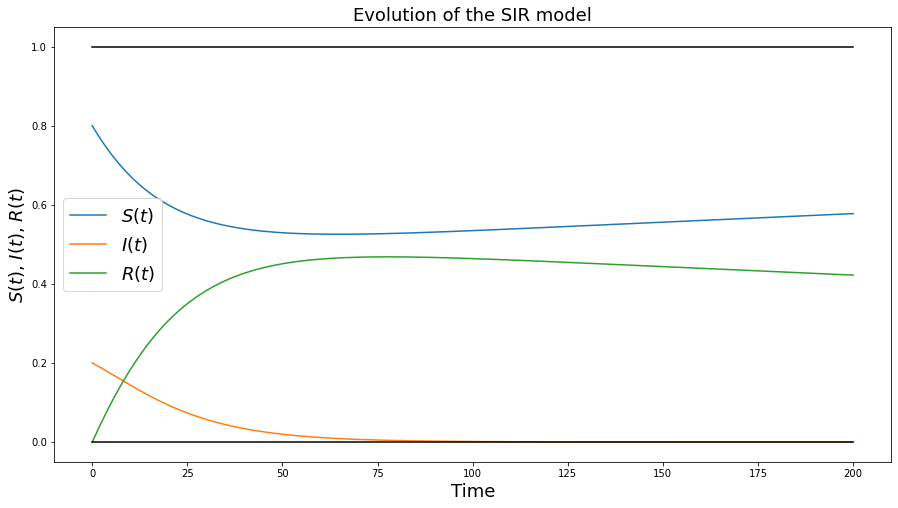

In [11]:
#Example 1

S0 = 0.8
I0 = 0.2
alpha = 2
beta = 2.1
mu = 0.02
tmax = 200

SIR_model_Vital_Dynamics_delta0(S0, I0, alpha, beta, mu, tmax)

Equilibrium: (1.0, 0.0, 0.0)


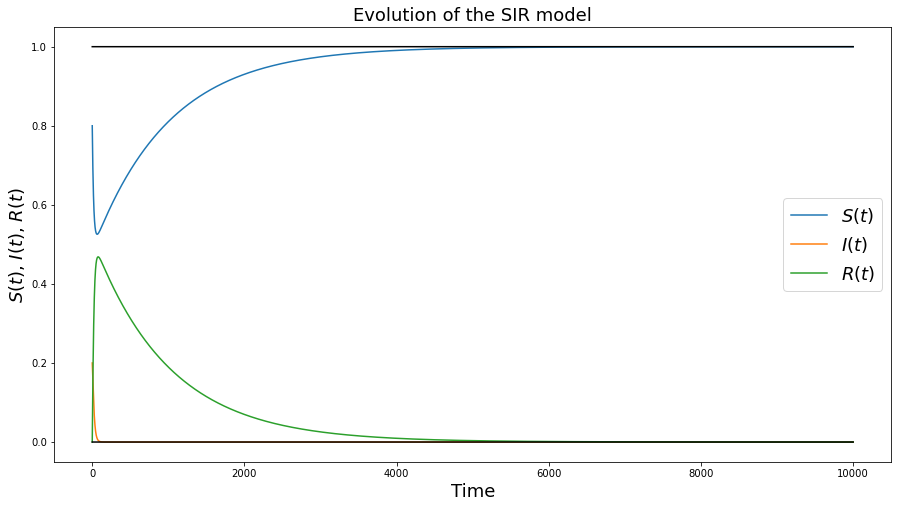

In [13]:
#Example 2 (Example 1 with a longer timeline, actually)

S0 = 0.8
I0 = 0.2
alpha = 2
beta = 2.1
mu = 0.02
tmax = 10000

SIR_model_Vital_Dynamics_delta0(S0, I0, alpha, beta, mu, tmax)

Equilibrium: (0.425, 0.034, 0.541)


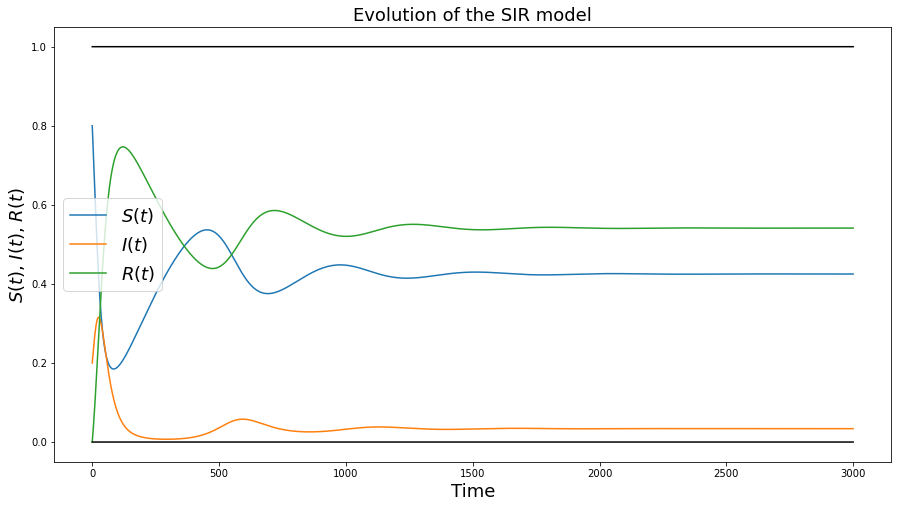

In [15]:
#Example 3

S0 = 0.8
I0 = 0.2
alpha = 2
beta = 0.8
mu = 0.05
tmax = 3000

SIR_model_Vital_Dynamics_delta0(S0, I0, alpha, beta, mu, tmax)

In [17]:
def SIS_model(S0, I0, alpha, beta, tmax):
    
    tab_t = np.arange(0, tmax+1)
    S = np.zeros(tmax+1)
    I = np.zeros(tmax+1)
    border_up = np.ones(tmax+1)
    border_down = np.zeros(tmax+1)
    
    S[0] = S0
    I[0] = I0
    
    for t in range(1, tmax+1):
        #We multiply by 0.05 to make the difference in time between time t and time t+1 as small as possible
        S[t] = S[t-1] + 0.05*( - alpha*S[t-1]*I[t-1] + beta*I[t-1]) 
        I[t] = I[t-1] + 0.05*(alpha*S[t-1]*I[t-1] - beta*I[t-1])

    print(f'Equilibrium: ({round(S[tmax], 3)}, {round(I[tmax], 3)})')
        
    #plot
    fig = plt.figure(figsize=(15, 8))
    plt.plot(tab_t, S, label = '$S(t)$')
    plt.plot(tab_t, I, label = '$I(t)$')
    plt.plot(tab_t, border_down, 'k')
    plt.plot(tab_t, border_up, 'k')
    plt.xlabel('Time', fontsize = 18)
    plt.ylabel('$S(t)$, $I(t)$', fontsize = 18)
    plt.legend(fontsize = 18)
    plt.title('SIS model', fontsize = 18)
    plt.show()

Equilibrium: (0.994, 0.006)


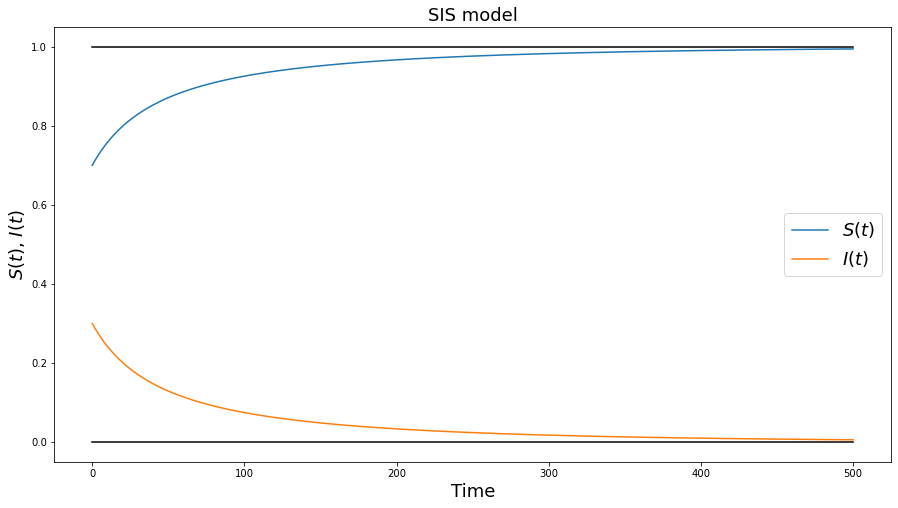

In [18]:
#Example 1

S0 = 0.7
I0 = 0.3
alpha = 1.2
beta = 1.3
tmax = 500

SIS_model(S0, I0, alpha, beta, tmax)

Equilibrium: (0.4, 0.6)


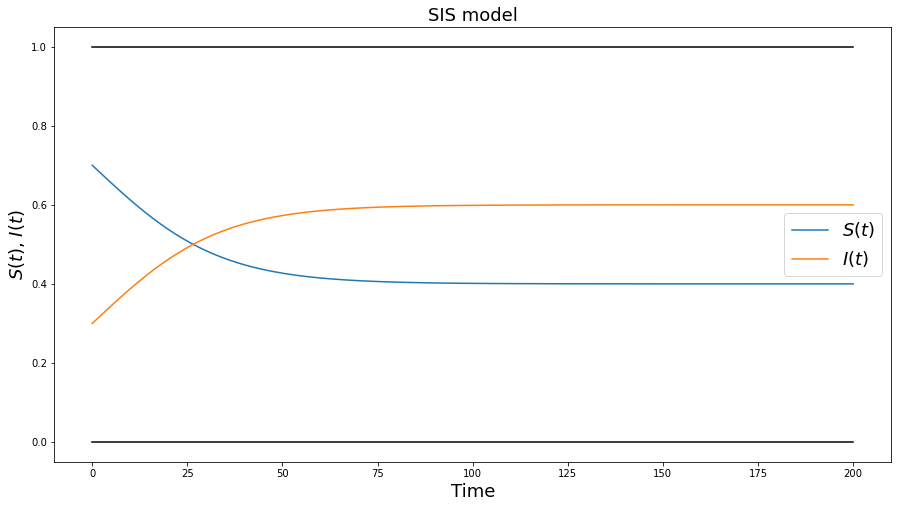

In [19]:
#Example 2

S0 = 0.7
I0 = 0.3
alpha = 2
beta = 0.8
tmax = 200

SIS_model(S0, I0, alpha, beta, tmax)